In [1]:
import requests

/Users/imtk/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
import json

def dump_jsonl(data, output_path, append=False, progress=False):
    """
    Write list of objects to a JSON lines file.
    """
    mode = 'a+' if append else 'w'
    with open(output_path, mode, encoding='utf-8') as f:
        if progress:
            data = tqdm(data)
            
        for line in data:
            json_record = json.dumps(line, ensure_ascii=False)
            f.write(json_record + '\n')
    print('Wrote {} records to {}'.format(len(data), output_path))

def load_jsonl(input_path, progress=False) -> list:
    """
    Read list of objects from a JSON lines file.
    """
    data = []
    with open(input_path, 'r', encoding='utf-8') as f:
        if progress:
            f = tqdm(f)
            
        for line in f:
                data.append(json.loads(line.rstrip('\n|\r')))
            
    print('Loaded {} records from {}'.format(len(data), input_path))
    return data


In [3]:
def get_hashtags(date, hour=9):
    resp = requests.get(f"https://api.exportdata.io/trends/locations/th?date={date}&hour={hour}")
    return resp.json()

In [4]:
# import datetime
# import time
# from tqdm import tqdm
# twitterTrands = []
# base = datetime.datetime.today()
# numdays = 365


# for d in tqdm(range(numdays), total=numdays):
#     for h in range(24):
#         newdate = base - datetime.timedelta(days=d)
#         date = newdate.strftime("%Y-%m-%d")
#         hour = h
#         resp = get_hashtags(date, hour)

#         twitterTrands.append({
#             "date": date,
#             "hour": hour,
#             "trends": resp
#         })
#         time.sleep(0.01)

In [5]:
# dump_jsonl(twitterTrands, "twitter_trends_v2.jsonl")

In [6]:
twitterTrands = load_jsonl("./raw_data/twitter_trends_v2.jsonl")

Loaded 8760 records from ./raw_data/twitter_trends_v2.jsonl


In [7]:
from collections import defaultdict

allTrends = defaultdict(list)
cntTweets = defaultdict(int)
for d in twitterTrands:
    for trend in d["trends"]:
        if trend["tweet_volume"] is None:
            continue
            
        allTrends[trend["name"]].append(d["date"])
        cntTweets[trend["name"]] += trend["tweet_volume"]


In [8]:
from datetime import datetime

trendTime = {}
duration = []
for trend in allTrends:
    mn, mx = min(allTrends[trend]), max(allTrends[trend])
    delta = datetime.strptime(mx, "%Y-%m-%d") - datetime.strptime(mn, "%Y-%m-%d")
    trendTime[trend] = {
        "min": mn,
        "max": mx,
        "duration": delta.days,
        "len": len(allTrends[trend])
    }
    
    duration.append(delta.days)

In [9]:
# Number of tweets from a hashtag

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df_describe = pd.DataFrame([cntTweets[t]/trendTime[t]["duration"] for t in cntTweets if trendTime[t]["duration"]>0])
df_describe.describe()

,0
count,14034.00000
mean,1336191.92848
std,3146674.50826
min,85.80333
25%,101667.67391
50%,394144.00000
75%,1225557.25000
max,81393354.00000


In [10]:
# How long a tweet is trendy
import pandas as pd

df_describe = pd.DataFrame([d for d in duration if d>0])
df_describe.describe()

,0
count,14034.00000
mean,32.14351
std,78.82228
min,1.00000
25%,1.00000
50%,1.00000
75%,3.75000
max,364.00000


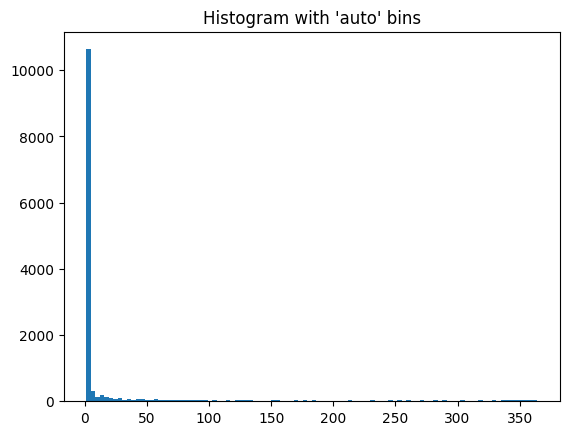

In [11]:
import matplotlib.pyplot as plt
import numpy as np

_ = plt.hist([d for d in duration if d>0], bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [12]:
hashtags = []
for trend in trendTime:
    if trendTime[trend]["duration"] >= 2 and trendTime[trend]["duration"] < 78 and trend[0].startswith("#"):
        if cntTweets[trend]/trendTime[trend]["len"] > 60000:
#         if trendTime[trend]["len"] > 0.4*trendTime[trend]["duration"]:
#             print(trend)
            hashtags.append((trend, trendTime[trend]["duration"], cntTweets[trend]/trendTime[trend]["len"]))
len(hashtags)

1419

In [13]:
hashtags[0:100]

[('#BORNPINKBANGKOK', 16, 77803.85),
 ('#PenfoldsxBibleBuild', 2, 1131670.2758620689),
 ('#รัก7ปีEP3', 2, 95817.95238095238),
 ('#Lazada1111LiveTH', 2, 579158.2),
 ('#DakasixPP', 27, 79393.62962962964),
 ('#지구에서년지성아_환영해', 5, 1080192.423076923),
 ('#FinalNPT2023xENGLOT', 2, 301708.35714285716),
 ('#LoveinTheAirFinale', 2, 278945.0740740741),
 ('#BazaarSGXApo', 2, 1347795.1612903227),
 ('#CalvinKleinTH', 3, 181456.3260869565),
 ('#SmileyofCharlotte', 38, 85538.77272727272),
 ('#GiffarineHyaXMileApo', 68, 172667.17142857143),
 ('#TransitLove2', 29, 65472.5),
 ('#BLACKPINK_WORLDTOUR', 15, 90301.28571428571),
 ('#开云体育', 2, 191204.2),
 ('#EXchange2', 29, 60775.53333333333),
 ('#madamelouisexoffgun', 2, 61232.125),
 ('#1111โปรแรงแซงไบเบิ้ลบิว', 2, 749218.7777777778),
 ('#YinWarConcert', 24, 238399.6923076923),
 ('#จันทรุปราคา', 2, 78998.2),
 ('#WelcomeJAYBtoThailand', 29, 101936.19298245614),
 ('#แบนมิลลิ', 34, 135430.8085106383),
 ('#เด็ก18ฆ่าเด็ก13', 2, 146035.31707317074),
 ('#SoundCheckxN